# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
#Output File
out_file_data="output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library
Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

To fulfill the first requirement, you'll use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code. Next, you'll create a series of scatter plots to showcase the following relationships:

Latitude vs. Temperature
Latitude vs. Humidity
Latitude vs. Cloudiness
Latitude vs. Wind Speed

In [44]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 645


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [46]:
# API queries now
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
clouds = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

# Create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()

    # Group cities in sets of 100 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Append the City information
    try:
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        
        # Log the url,set the record number, set count and city
        print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
        
        record_count+=1
    except (KeyError):
        print("City not found. skipping.")
        pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | hami
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | yanji
Processing Record 6 of Set 1 | beyneu
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | akureyri
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | hermanus
City not found. skipping.
Processing Record 13 of Set 1 | arraial do cabo
City not found. skipping.
Processing Record 14 of Set 1 | chaozhou
Processing Record 15 of Set 1 | maneadero
Processing Record 16 of Set 1 | souillac
Processing Record 17 of Set 1 | bengkulu
City not found. skipping.
Processing Record 18 of Set 1 | rio gallegos
Processing Record 19 of Set 1 | alta gracia
Processing Record 20 of Set 1 | boyabat
Processing Record 21 of Set 1 | navolato
Processing Record 22 of Set 1 | ilebo
Processing Record 23 of 

Processing Record 7 of Set 5 | bjornevatn
Processing Record 8 of Set 5 | ganzhou
Processing Record 9 of Set 5 | rocha
Processing Record 10 of Set 5 | hirara
Processing Record 11 of Set 5 | alakurtti
City not found. skipping.
Processing Record 12 of Set 5 | mansfield
Processing Record 13 of Set 5 | taltal
Processing Record 14 of Set 5 | chokurdakh
Processing Record 15 of Set 5 | sinnamary
Processing Record 16 of Set 5 | bardiyah
Processing Record 17 of Set 5 | kloulklubed
Processing Record 18 of Set 5 | middelburg
Processing Record 19 of Set 5 | constitucion
Processing Record 20 of Set 5 | san quintin
Processing Record 21 of Set 5 | gornyak
Processing Record 22 of Set 5 | charters towers
Processing Record 23 of Set 5 | lompoc
Processing Record 24 of Set 5 | hare bay
City not found. skipping.
Processing Record 25 of Set 5 | dicabisagan
Processing Record 26 of Set 5 | akdepe
Processing Record 27 of Set 5 | jiaocheng
Processing Record 28 of Set 5 | mangrol
Processing Record 29 of Set 5 | h

Processing Record 14 of Set 9 | barillas
Processing Record 15 of Set 9 | zhigalovo
Processing Record 16 of Set 9 | upata
Processing Record 17 of Set 9 | bathsheba
Processing Record 18 of Set 9 | deputatskiy
City not found. skipping.
Processing Record 19 of Set 9 | illapel
Processing Record 20 of Set 9 | sompeta
Processing Record 21 of Set 9 | bukama
City not found. skipping.
Processing Record 22 of Set 9 | rantepao
Processing Record 23 of Set 9 | lata
Processing Record 24 of Set 9 | bonavista
Processing Record 25 of Set 9 | hervey bay
Processing Record 26 of Set 9 | chapais
Processing Record 27 of Set 9 | salto
Processing Record 28 of Set 9 | mackay
Processing Record 29 of Set 9 | sorland
Processing Record 30 of Set 9 | natal
Processing Record 31 of Set 9 | charyshskoye
Processing Record 32 of Set 9 | porto novo
City not found. skipping.
Processing Record 33 of Set 9 | khatra
Processing Record 34 of Set 9 | socorro
Processing Record 35 of Set 9 | neyshabur
Processing Record 36 of Set 9

Processing Record 17 of Set 13 | panuco
City not found. skipping.
Processing Record 18 of Set 13 | tautira
Processing Record 19 of Set 13 | dahuk
Processing Record 20 of Set 13 | whitehorse
Processing Record 21 of Set 13 | leshukonskoye
Processing Record 22 of Set 13 | trelleborg
Processing Record 23 of Set 13 | mujiayingzi
Processing Record 24 of Set 13 | mount gambier
Processing Record 25 of Set 13 | alyangula
Processing Record 26 of Set 13 | mabaruma
Processing Record 27 of Set 13 | touros
Processing Record 28 of Set 13 | erzin
Processing Record 29 of Set 13 | kamenka
City not found. skipping.
Processing Record 30 of Set 13 | barentu
Processing Record 31 of Set 13 | sri madhopur
Processing Record 32 of Set 13 | fernandopolis
Processing Record 33 of Set 13 | bambanglipuro
City not found. skipping.
Processing Record 34 of Set 13 | luwingu
Processing Record 35 of Set 13 | kapuskasing
Processing Record 36 of Set 13 | san ramon
Processing Record 37 of Set 13 | pescara
Processing Record 3

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({"City":city, 
                        "Cloudiness":clouds, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_data_df = city_data_df.rename_axis('City ID')

city_data_df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,australind,100,BR,1681010067,98,-24.7911,-50.0119,60.46,7.20
1,australind,20,US,1681009923,41,33.6001,-101.8338,65.14,10.36
2,australind,20,TO,1681010068,74,-21.2000,-175.2000,86.16,13.80
3,australind,24,ID,1681010068,67,-7.9500,110.2833,84.02,6.35
4,australind,5,PF,1681010068,62,-23.1203,-134.9692,76.96,14.12


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,australind,100,BR,1681010067,98,-24.7911,-50.0119,60.46,7.20
1,australind,20,US,1681009923,41,33.6001,-101.8338,65.14,10.36
2,australind,20,TO,1681010068,74,-21.2000,-175.2000,86.16,13.80
3,australind,24,ID,1681010068,67,-7.9500,110.2833,84.02,6.35
4,australind,5,PF,1681010068,62,-23.1203,-134.9692,76.96,14.12


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

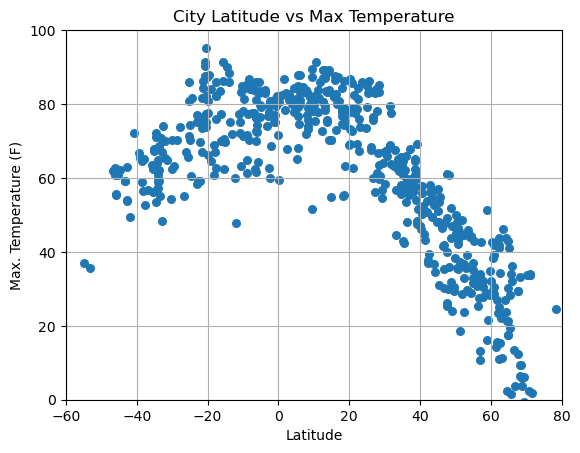

In [25]:
# scatter plot for latitude vs. temperature with graph properites
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o',s=30)
plt.title("City Latitude vs Max Temperature")
plt.ylim(0,100)
plt.xlim(-60, 80)
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

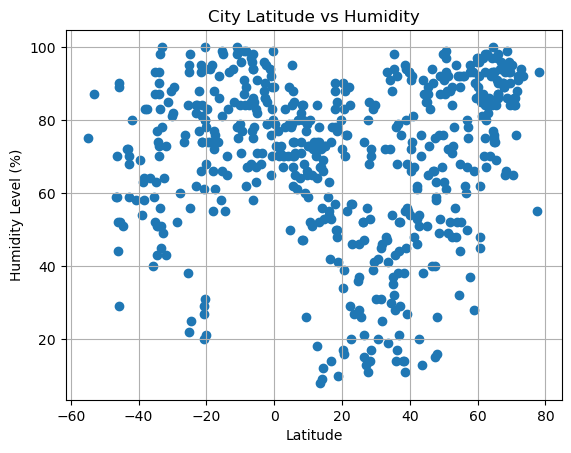

In [26]:
#scatter plots for latitude vs. humidity with graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o')
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

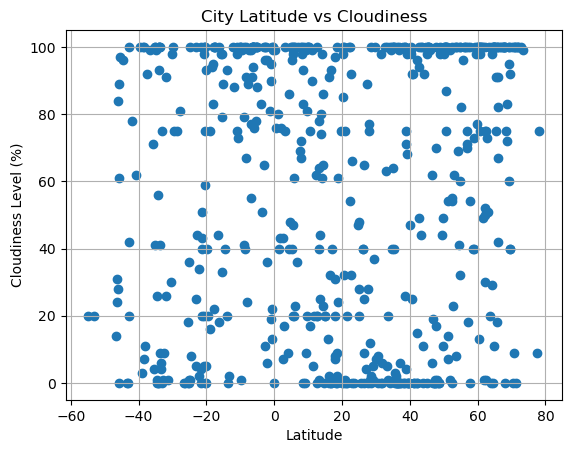

In [27]:
# scatter plots for latitude vs. cloudiness with graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o')
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

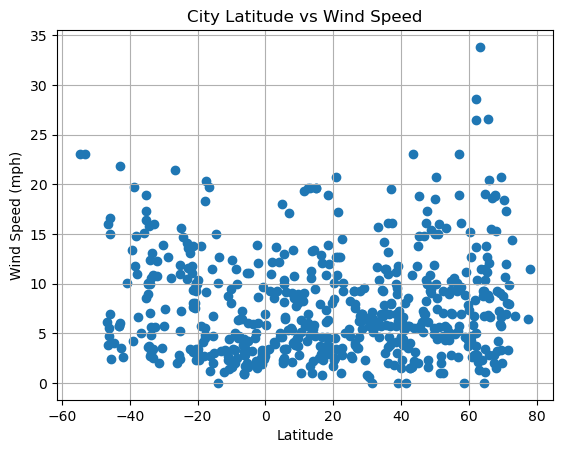

In [28]:
# scatter plots for latitude vs. wind speed with graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o')
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = city_df.loc[city_df["Lat"]>0]
south_hemi = city_df.loc[city_df["Lat"]<0]
#create linear regression plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [33]:
# Display sample data
north_hemi.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
1,australind,20,US,1681009923,41,33.6001,-101.8338,65.14,10.36
5,australind,100,GL,1681010068,97,65.6145,-37.6368,34.03,26.53
6,australind,100,US,1681010032,94,35.2271,-80.8431,42.89,7.00
7,australind,40,BB,1681010069,78,13.2167,-59.5167,79.41,19.57
8,australind,100,US,1681010069,98,35.3501,-80.2001,42.46,11.50


###  Temperature vs. Latitude Linear Regression Plot

Text(0.5, 0, 'Latitude')

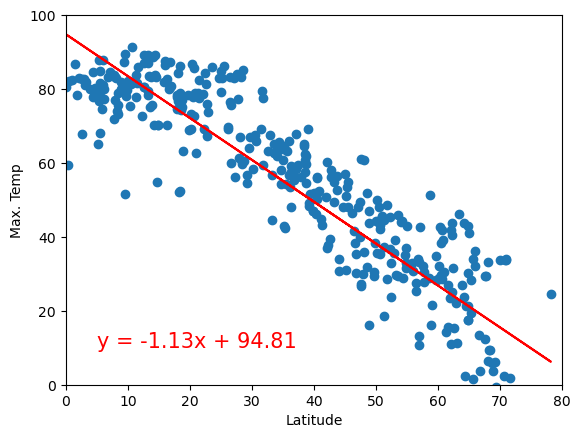

In [34]:
# Linear regression on Northern Hemisphere
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.ylim(0,100)
plt.xlim(0, 80)
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

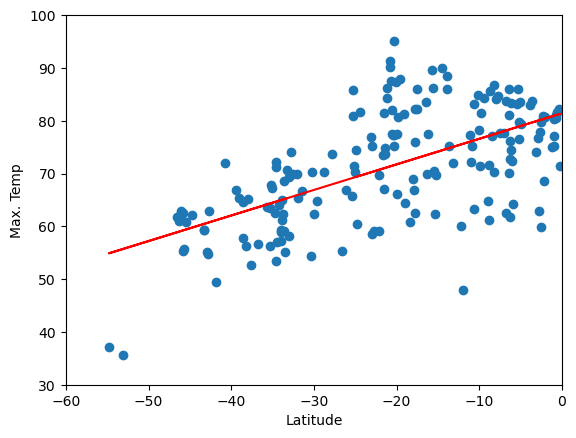

In [36]:
# Linear regression on Southern Hemisphere
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylim(30, 100)
plt.xlim(-60, 0, 10)
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")


**Discussion about the linear relationship:**

### Humidity vs. Latitude Linear Regression Plot

Text(0.5, 0, 'Latitude')

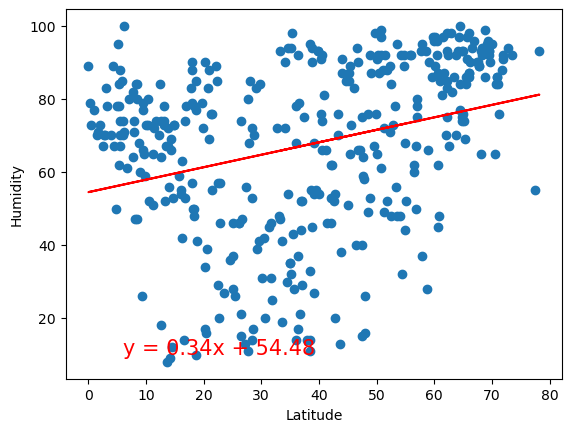

In [37]:
# Northern Hemisphere
x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

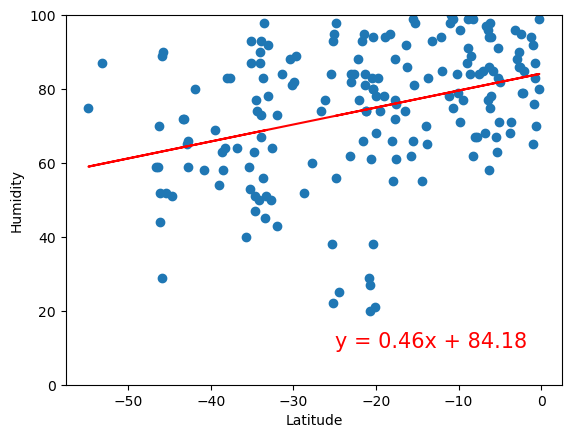

In [38]:
# Southern Hemisphere
x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylim(0, 100)
plt.ylabel("Humidity")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** 

### Cloudiness vs. Latitude Linear Regression Plot

Text(0.5, 0, 'Latitude')

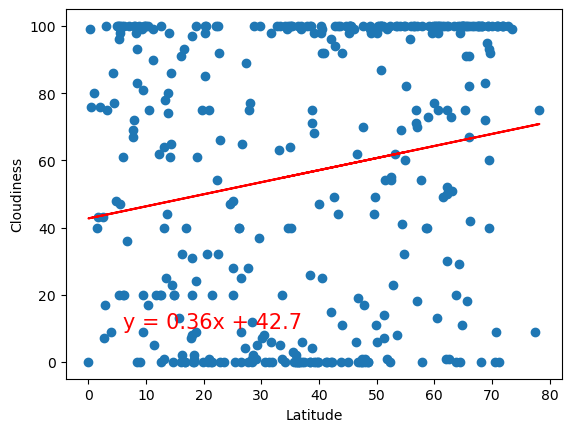

In [39]:
# Northern Hemisphere
x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

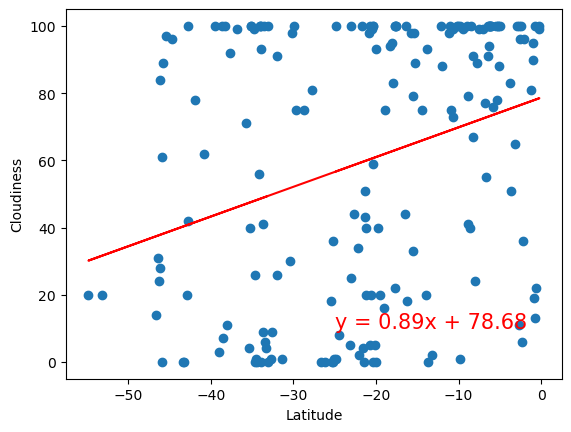

In [40]:
# Southern Hemisphere
x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Text(0.5, 0, 'Latitude')

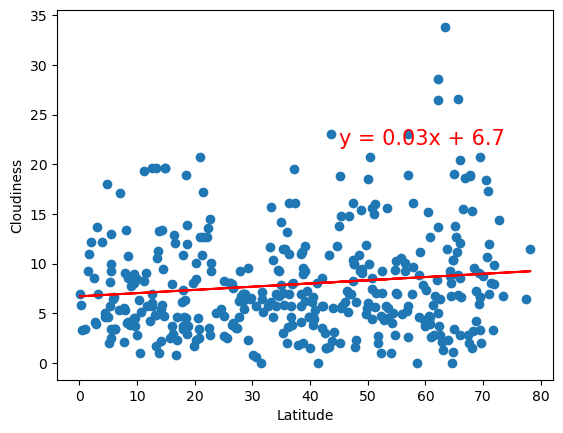

In [41]:
# Northern Hemisphere
x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

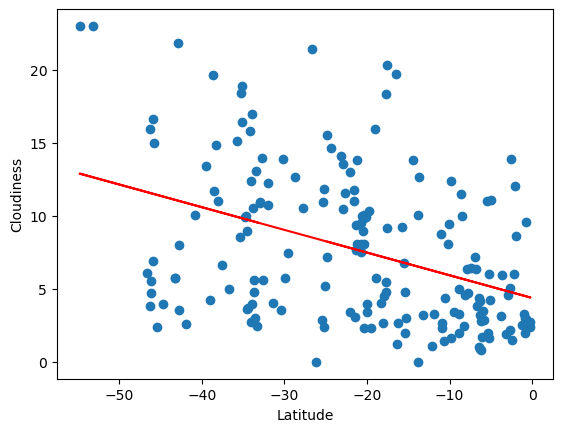

In [42]:
# Southern Hemisphere
x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE